In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
data_encoded=pd.get_dummies(df)

In [7]:
data_encoded

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [8]:
data_encoded.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [9]:
df = data_encoded

In [10]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


In [11]:
df.drop(['US_No','ShelveLoc_Medium','Urban_No'],inplace=True,axis=1)

In [12]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,-0.033094,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,0.081122,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.039197,0.078864


In [13]:
dtree_reg = DecisionTreeRegressor(min_samples_split=5,max_depth=4,max_features=4)

In [14]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X_train)

In [20]:
X_scaled_test = scaler.transform(X_test)

In [21]:
dtree_reg.fit(X_scaled,y_train)
print(dtree_reg.feature_importances_)

[0.06878614 0.11897527 0.04631081 0.00473379 0.12774612 0.22747226
 0.         0.         0.40597561 0.         0.        ]


In [22]:
X_train_selected = X_scaled[:,[0,2,4,8]]

In [23]:
X_test_selected = X_scaled_test[:,[0,2,4,8]]

In [24]:
X_train_selected.shape

(280, 4)

In [25]:
X_test_selected.shape

(120, 4)

In [26]:
dtree_reg.fit(X_train_selected,y_train)

DecisionTreeRegressor(max_depth=4, max_features=4, min_samples_split=5)

In [27]:
dtree_reg.score(X_train_selected,y_train)

0.6552725987136517

In [28]:
dtree_reg.score(X_test_selected,y_test)

0.45342512110634703

In [29]:
from sklearn.model_selection import GridSearchCV, KFold

In [30]:
dtree_reg = DecisionTreeRegressor()

In [31]:
min_samples_split = [3,4,5,6,7,8,9,10,11,12]
max_depth = [3,4,5,6,7,8]
max_features = [None,3,4,5]

param_grid = dict(min_samples_split = min_samples_split,max_depth = max_depth,max_features= max_features)

grid = GridSearchCV(estimator = dtree_reg,param_grid = param_grid,cv = KFold(n_splits=5,shuffle=True), verbose = 10)
grid_result = grid.fit(X_scaled,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV 1/5; 1/1200] START max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3
[CV 1/5; 1/1200] END max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3; total time=   0.0s
[CV 2/5; 1/1200] START max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3
[CV 2/5; 1/1200] END max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3; total time=   0.0s
[CV 3/5; 1/1200] START max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3
[CV 3/5; 1/1200] END max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3; total time=   0.0s
[CV 4/5; 1/1200] START max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3
[CV 4/5; 1/1200] END max_depth=3, max_features=None, min_impurity_split=None, min_samples_split=3; total time=   0.0s
[CV 5/5; 1/1200] START max_depth=3, max_features=None, min_impu

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 11/1200] START max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=3
[CV 4/5; 11/1200] END max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 5/5; 11/1200] START max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=3
[CV 5/5; 11/1200] END max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 1/5; 12/1200] START max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=4
[CV 1/5; 12/1200] END max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 2/5; 12/1200] START max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=4
[CV 2/5; 12/1200] END max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 3/5; 12/1200] START max_depth=3, max_features=None, min_impurity_split=0.1, min_samples_split=4
[CV 3/5; 12/1200] END max_d

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 24/1200] START max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=6
[CV 5/5; 24/1200] END max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=6; total time=   0.0s
[CV 1/5; 25/1200] START max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 1/5; 25/1200] END max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 2/5; 25/1200] START max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 2/5; 25/1200] END max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 3/5; 25/1200] START max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 3/5; 25/1200] END max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 4/5; 25/1200] START max_depth=3, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 4/5; 25/1200] END max_d

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 37/1200] END max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 2/5; 37/1200] START max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 2/5; 37/1200] END max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 3/5; 37/1200] START max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 3/5; 37/1200] END max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 4/5; 37/1200] START max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 4/5; 37/1200] END max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 5/5; 37/1200] START max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 5/5; 37/1200] END max_depth=3, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 48/1200] END max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 4/5; 48/1200] START max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 4/5; 48/1200] END max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 5/5; 48/1200] START max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 5/5; 48/1200] END max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 1/5; 49/1200] START max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=11
[CV 1/5; 49/1200] END max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=11; total time=   0.0s
[CV 2/5; 49/1200] START max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=11
[CV 2/5; 49/1200] END max_depth=3, max_features=None, min_impurity_split=0.25, min_samples_split=11; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 61/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 1/5; 62/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 1/5; 62/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 2/5; 62/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 2/5; 62/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 3/5; 62/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 3/5; 62/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 4/5; 62/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 4/5; 62/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 5/5; 62/1200] START max_depth=3, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 69/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 4/5; 69/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=11
[CV 4/5; 69/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 5/5; 69/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=11
[CV 5/5; 69/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 1/5; 70/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=12
[CV 1/5; 70/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 2/5; 70/1200] START max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=12
[CV 2/5; 70/1200] END max_depth=3, max_features=3, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 3/5; 70/1200] START max_

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 78/1200] END max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 2/5; 78/1200] START max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10
[CV 2/5; 78/1200] END max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 3/5; 78/1200] START max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10
[CV 3/5; 78/1200] END max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 4/5; 78/1200] START max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10
[CV 4/5; 78/1200] END max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 5/5; 78/1200] START max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10
[CV 5/5; 78/1200] END max_depth=3, max_features=3, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 1/5; 79/1200] START max_

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 91/1200] START max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3
[CV 3/5; 91/1200] END max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 4/5; 91/1200] START max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3
[CV 4/5; 91/1200] END max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 5/5; 91/1200] START max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3
[CV 5/5; 91/1200] END max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 1/5; 92/1200] START max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=4
[CV 1/5; 92/1200] END max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=4; total time=   0.0s
[CV 2/5; 92/1200] START max_depth=3, max_features=3, min_impurity_split=0.25, min_samples_split=4
[CV 2/5; 92/1200] END max_depth=3, max_featur

[CV 5/5; 104/1200] END max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 1/5; 105/1200] START max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7
[CV 1/5; 105/1200] END max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 2/5; 105/1200] START max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7
[CV 2/5; 105/1200] END max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 3/5; 105/1200] START max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7
[CV 3/5; 105/1200] END max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 4/5; 105/1200] START max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7
[CV 4/5; 105/1200] END max_depth=3, max_features=4, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 5/5; 105/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 117/1200] END max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 4/5; 117/1200] START max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=9
[CV 4/5; 117/1200] END max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 5/5; 117/1200] START max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=9
[CV 5/5; 117/1200] END max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 1/5; 118/1200] START max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 1/5; 118/1200] END max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 2/5; 118/1200] START max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 2/5; 118/1200] END max_depth=3, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 3/5; 118/1200] START

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 130/1200] END max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 3/5; 130/1200] START max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 3/5; 130/1200] END max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 4/5; 130/1200] START max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 4/5; 130/1200] END max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 5/5; 130/1200] START max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 5/5; 130/1200] END max_depth=3, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 1/5; 131/1200] START max_depth=3, max_features=4, min_impurity_split=0.15, min_samples_split=3
[CV 1/5; 131/1200] END max_depth=3, max_features=4, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 2/5; 131/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 143/1200] END max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 4/5; 143/1200] START max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 4/5; 143/1200] END max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 5/5; 143/1200] START max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 5/5; 143/1200] END max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 1/5; 144/1200] START max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=6
[CV 1/5; 144/1200] END max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 2/5; 144/1200] START max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=6
[CV 2/5; 144/1200] END max_depth=3, max_features=4, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 3/5; 144/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 2/5; 157/1200] START max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9
[CV 2/5; 157/1200] END max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 3/5; 157/1200] START max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9
[CV 3/5; 157/1200] END max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 4/5; 157/1200] START max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9
[CV 4/5; 157/1200] END max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 5/5; 157/1200] START max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9
[CV 5/5; 157/1200] END max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 1/5; 158/1200] START max_depth=3, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 1/5; 158/1200] END max_depth=3,

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 170/1200] START max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 3/5; 170/1200] END max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 4/5; 170/1200] START max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 4/5; 170/1200] END max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 5/5; 170/1200] START max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 5/5; 170/1200] END max_depth=3, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 1/5; 171/1200] START max_depth=3, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 1/5; 171/1200] END max_depth=3, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 2/5; 171/1200] START max_depth=3, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 2/5; 171/1200] END max_depth=3, max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 182/1200] START max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 1/5; 182/1200] END max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 2/5; 182/1200] START max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 2/5; 182/1200] END max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 3/5; 182/1200] START max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 3/5; 182/1200] END max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 4/5; 182/1200] START max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 4/5; 182/1200] END max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 5/5; 182/1200] START max_depth=3, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 5/5; 182/1200] END max_depth=3, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 194/1200] START max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 2/5; 194/1200] END max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 3/5; 194/1200] START max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 3/5; 194/1200] END max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 4/5; 194/1200] START max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 4/5; 194/1200] END max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 5/5; 194/1200] START max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 5/5; 194/1200] END max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 1/5; 195/1200] START max_depth=3, max_features=5, min_impurity_split=0.25, min_samples_split=7
[CV 1/5; 195/1200] END max_depth=3, m

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 206/1200] START max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=8
[CV 5/5; 206/1200] END max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 1/5; 207/1200] START max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9
[CV 1/5; 207/1200] END max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 2/5; 207/1200] START max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9
[CV 2/5; 207/1200] END max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 3/5; 207/1200] START max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9
[CV 3/5; 207/1200] END max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 4/5; 207/1200] START max_depth=4, max_features=None, min_impurity_split=None, min_samples_split=9
[CV 4/5; 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 218/1200] END max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 4/5; 218/1200] START max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=10
[CV 4/5; 218/1200] END max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 5/5; 218/1200] START max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=10
[CV 5/5; 218/1200] END max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 1/5; 219/1200] START max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=11
[CV 1/5; 219/1200] END max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 2/5; 219/1200] START max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=11
[CV 2/5; 219/1200] END max_depth=4, max_features=None, min_impurity_split=0.1, min_samples_split=11; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 231/1200] END max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 2/5; 231/1200] START max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3
[CV 2/5; 231/1200] END max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 3/5; 231/1200] START max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3
[CV 3/5; 231/1200] END max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 4/5; 231/1200] START max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3
[CV 4/5; 231/1200] END max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 5/5; 231/1200] START max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3
[CV 5/5; 231/1200] END max_depth=4, max_features=None, min_impurity_split=0.15, min_samples_split=3; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 242/1200] END max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=4; total time=   0.0s
[CV 4/5; 242/1200] START max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=4
[CV 4/5; 242/1200] END max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=4; total time=   0.0s
[CV 5/5; 242/1200] START max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=4
[CV 5/5; 242/1200] END max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=4; total time=   0.0s
[CV 1/5; 243/1200] START max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=5
[CV 1/5; 243/1200] END max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 2/5; 243/1200] START max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=5
[CV 2/5; 243/1200] END max_depth=4, max_features=None, min_impurity_split=0.25, min_samples_split=5; total time

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 254/1200] END max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 1/5; 255/1200] START max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7
[CV 1/5; 255/1200] END max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 2/5; 255/1200] START max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7
[CV 2/5; 255/1200] END max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 3/5; 255/1200] START max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7
[CV 3/5; 255/1200] END max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 4/5; 255/1200] START max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7
[CV 4/5; 255/1200] END max_depth=4, max_features=3, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 5/5; 255/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 267/1200] START max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=9
[CV 4/5; 267/1200] END max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 5/5; 267/1200] START max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=9
[CV 5/5; 267/1200] END max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 1/5; 268/1200] START max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=10
[CV 1/5; 268/1200] END max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 2/5; 268/1200] START max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=10
[CV 2/5; 268/1200] END max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 3/5; 268/1200] START max_depth=4, max_features=3, min_impurity_split=0.1, min_samples_split=10
[CV 3/5; 268/1200] END max_depth=4, max_

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 281/1200] END max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 4/5; 281/1200] START max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=3
[CV 4/5; 281/1200] END max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 5/5; 281/1200] START max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=3
[CV 5/5; 281/1200] END max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 1/5; 282/1200] START max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=4
[CV 1/5; 282/1200] END max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 2/5; 282/1200] START max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=4
[CV 2/5; 282/1200] END max_depth=4, max_features=3, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 3/5; 282/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 294/1200] END max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 1/5; 295/1200] START max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 1/5; 295/1200] END max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 2/5; 295/1200] START max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 2/5; 295/1200] END max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 3/5; 295/1200] START max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 3/5; 295/1200] END max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 4/5; 295/1200] START max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 4/5; 295/1200] END max_depth=4, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 5/5; 295/1200]

[CV 1/5; 308/1200] END max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 2/5; 308/1200] START max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 2/5; 308/1200] END max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 3/5; 308/1200] START max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 3/5; 308/1200] END max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 4/5; 308/1200] START max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 4/5; 308/1200] END max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 5/5; 308/1200] START max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 5/5; 308/1200] END max_depth=4, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 1/5; 3

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 321/1200] END max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 2/5; 321/1200] START max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 2/5; 321/1200] END max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 3/5; 321/1200] START max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 3/5; 321/1200] END max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 4/5; 321/1200] START max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 4/5; 321/1200] END max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 5/5; 321/1200] START max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 5/5; 321/1200] END max_depth=4, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 1/5; 322/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 333/1200] END max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 1/5; 334/1200] START max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 1/5; 334/1200] END max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 2/5; 334/1200] START max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 2/5; 334/1200] END max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 3/5; 334/1200] START max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 3/5; 334/1200] END max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 4/5; 334/1200] START max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 4/5; 334/1200] END max_depth=4, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 5/5; 334/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 2/5; 347/1200] END max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 3/5; 347/1200] START max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9
[CV 3/5; 347/1200] END max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 4/5; 347/1200] START max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9
[CV 4/5; 347/1200] END max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 5/5; 347/1200] START max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9
[CV 5/5; 347/1200] END max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 1/5; 348/1200] START max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=10
[CV 1/5; 348/1200] END max_depth=4, max_features=4, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 2/5; 348/120

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 361/1200] END max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 3/5; 361/1200] START max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3
[CV 3/5; 361/1200] END max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 4/5; 361/1200] START max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3
[CV 4/5; 361/1200] END max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 5/5; 361/1200] START max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3
[CV 5/5; 361/1200] END max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 1/5; 362/1200] START max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=4
[CV 1/5; 362/1200] END max_depth=4, max_features=5, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 2/5; 362/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 374/1200] END max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=6; total time=   0.0s
[CV 4/5; 374/1200] START max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=6
[CV 4/5; 374/1200] END max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=6; total time=   0.0s
[CV 5/5; 374/1200] START max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=6
[CV 5/5; 374/1200] END max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=6; total time=   0.0s
[CV 1/5; 375/1200] START max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=7
[CV 1/5; 375/1200] END max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 2/5; 375/1200] START max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=7
[CV 2/5; 375/1200] END max_depth=4, max_features=5, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 3/5; 375/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 386/1200] END max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 4/5; 386/1200] START max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=8
[CV 4/5; 386/1200] END max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 5/5; 386/1200] START max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=8
[CV 5/5; 386/1200] END max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 1/5; 387/1200] START max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=9
[CV 1/5; 387/1200] END max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 2/5; 387/1200] START max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=9
[CV 2/5; 387/1200] END max_depth=4, max_features=5, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 3/5; 387/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 400/1200] START max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12
[CV 1/5; 400/1200] END max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 2/5; 400/1200] START max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12
[CV 2/5; 400/1200] END max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 3/5; 400/1200] START max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12
[CV 3/5; 400/1200] END max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 4/5; 400/1200] START max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12
[CV 4/5; 400/1200] END max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 5/5; 400/1200] START max_depth=4, max_features=5, min_impurity_split=0.25, min_samples_split=12
[CV 5/5; 400/1200] END max_

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 412/1200] START max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=4
[CV 5/5; 412/1200] END max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 1/5; 413/1200] START max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5
[CV 1/5; 413/1200] END max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5; total time=   0.0s
[CV 2/5; 413/1200] START max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5
[CV 2/5; 413/1200] END max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5; total time=   0.0s
[CV 3/5; 413/1200] START max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5
[CV 3/5; 413/1200] END max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5; total time=   0.0s
[CV 4/5; 413/1200] START max_depth=5, max_features=None, min_impurity_split=0.1, min_samples_split=5
[CV 4/5; 413/1200]

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 425/1200] START max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 1/5; 425/1200] END max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 2/5; 425/1200] START max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 2/5; 425/1200] END max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 3/5; 425/1200] START max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 3/5; 425/1200] END max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 4/5; 425/1200] START max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 4/5; 425/1200] END max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7; total time=   0.0s
[CV 5/5; 425/1200] START max_depth=5, max_features=None, min_impurity_split=0.2, min_samples_split=7
[CV 5/5; 425/1200]

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 436/1200] START max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 4/5; 436/1200] END max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 5/5; 436/1200] START max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 5/5; 436/1200] END max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 1/5; 437/1200] START max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 1/5; 437/1200] END max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 2/5; 437/1200] START max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 2/5; 437/1200] END max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 3/5; 437/1200] START max_depth=5, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 3/5; 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 448/1200] END max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 4/5; 448/1200] START max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 4/5; 448/1200] END max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 5/5; 448/1200] START max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 5/5; 448/1200] END max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 1/5; 449/1200] START max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=11
[CV 1/5; 449/1200] END max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=11; total time=   0.0s
[CV 2/5; 449/1200] START max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=11
[CV 2/5; 449/1200] END max_depth=5, max_features=None, min_impurity_split=0.25, min_samples_split=11; t

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 462/1200] END max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 2/5; 462/1200] START max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 2/5; 462/1200] END max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 3/5; 462/1200] START max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 3/5; 462/1200] END max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 4/5; 462/1200] START max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 4/5; 462/1200] END max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 5/5; 462/1200] START max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 5/5; 462/1200] END max_depth=5, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 1/5; 463/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 476/1200] END max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 2/5; 476/1200] START max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8
[CV 2/5; 476/1200] END max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 3/5; 476/1200] START max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8
[CV 3/5; 476/1200] END max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 4/5; 476/1200] START max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8
[CV 4/5; 476/1200] END max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 5/5; 476/1200] START max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8
[CV 5/5; 476/1200] END max_depth=5, max_features=3, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 1/5; 477/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 489/1200] END max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=11; total time=   0.0s
[CV 1/5; 490/1200] START max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12
[CV 1/5; 490/1200] END max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 2/5; 490/1200] START max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12
[CV 2/5; 490/1200] END max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 3/5; 490/1200] START max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12
[CV 3/5; 490/1200] END max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 4/5; 490/1200] START max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12
[CV 4/5; 490/1200] END max_depth=5, max_features=3, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 5/5; 4

[CV 3/5; 503/1200] END max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=5; total time=   0.0s
[CV 4/5; 503/1200] START max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=5
[CV 4/5; 503/1200] END max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=5; total time=   0.0s
[CV 5/5; 503/1200] START max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=5
[CV 5/5; 503/1200] END max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=5; total time=   0.0s
[CV 1/5; 504/1200] START max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=6
[CV 1/5; 504/1200] END max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 2/5; 504/1200] START max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=6
[CV 2/5; 504/1200] END max_depth=5, max_features=4, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 3/5; 504/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 517/1200] START max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=9
[CV 5/5; 517/1200] END max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 1/5; 518/1200] START max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 1/5; 518/1200] END max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 2/5; 518/1200] START max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 2/5; 518/1200] END max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 3/5; 518/1200] START max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 3/5; 518/1200] END max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 4/5; 518/1200] START max_depth=5, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 4/5; 518/1200] END max_depth=5, ma

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 529/1200] END max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=11; total time=   0.0s
[CV 1/5; 530/1200] START max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 1/5; 530/1200] END max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 2/5; 530/1200] START max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 2/5; 530/1200] END max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 3/5; 530/1200] START max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 3/5; 530/1200] END max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 4/5; 530/1200] START max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12
[CV 4/5; 530/1200] END max_depth=5, max_features=4, min_impurity_split=0.2, min_samples_split=12; total time=   0.0s
[CV 5/5; 530/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 543/1200] END max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 2/5; 543/1200] START max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 2/5; 543/1200] END max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 3/5; 543/1200] START max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 3/5; 543/1200] END max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 4/5; 543/1200] START max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 4/5; 543/1200] END max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 5/5; 543/1200] START max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5
[CV 5/5; 543/1200] END max_depth=5, max_features=4, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 1/5; 544/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 2/5; 556/1200] START max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8
[CV 2/5; 556/1200] END max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 3/5; 556/1200] START max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8
[CV 3/5; 556/1200] END max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 4/5; 556/1200] START max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8
[CV 4/5; 556/1200] END max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 5/5; 556/1200] START max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8
[CV 5/5; 556/1200] END max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 1/5; 557/1200] START max_depth=5, max_features=5, min_impurity_split=None, min_samples_split=9
[CV 1/5; 557/1200] END max_depth=5, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 569/1200] END max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 4/5; 569/1200] START max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=11
[CV 4/5; 569/1200] END max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 5/5; 569/1200] START max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=11
[CV 5/5; 569/1200] END max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 1/5; 570/1200] START max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 1/5; 570/1200] END max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 2/5; 570/1200] START max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 2/5; 570/1200] END max_depth=5, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 3/5; 570/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 582/1200] END max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 2/5; 582/1200] START max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 2/5; 582/1200] END max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 3/5; 582/1200] START max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 3/5; 582/1200] END max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 4/5; 582/1200] START max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 4/5; 582/1200] END max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 5/5; 582/1200] START max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 5/5; 582/1200] END max_depth=5, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 1/5; 583/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 2/5; 593/1200] END max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 3/5; 593/1200] START max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 3/5; 593/1200] END max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 4/5; 593/1200] START max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 4/5; 593/1200] END max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 5/5; 593/1200] START max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 5/5; 593/1200] END max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 1/5; 594/1200] START max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 1/5; 594/1200] END max_depth=5, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 2/5; 594/1200]

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 604/1200] END max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 1/5; 605/1200] START max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 1/5; 605/1200] END max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 2/5; 605/1200] START max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 2/5; 605/1200] END max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 3/5; 605/1200] START max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 3/5; 605/1200] END max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 4/5; 605/1200] START max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 4/5; 605/1200] END max_depth=6, max_features=None, min_impurity_split=None, min_samples_split=7; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 615/1200] END max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=7; total time=   0.0s
[CV 1/5; 616/1200] START max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 1/5; 616/1200] END max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[CV 2/5; 616/1200] START max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 2/5; 616/1200] END max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[CV 3/5; 616/1200] START max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 3/5; 616/1200] END max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[CV 4/5; 616/1200] START max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 4/5; 616/1200] END max_depth=6, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 626/1200] START max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 3/5; 626/1200] END max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 4/5; 626/1200] START max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 4/5; 626/1200] END max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 5/5; 626/1200] START max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 5/5; 626/1200] END max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 1/5; 627/1200] START max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=9
[CV 1/5; 627/1200] END max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=9; total time=   0.0s
[CV 2/5; 627/1200] START max_depth=6, max_features=None, min_impurity_split=0.2, min_samples_split=9
[CV 2/5; 627/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 637/1200] END max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 2/5; 637/1200] START max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 2/5; 637/1200] END max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 3/5; 637/1200] START max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 3/5; 637/1200] END max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 4/5; 637/1200] START max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 4/5; 637/1200] END max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=   0.0s
[CV 5/5; 637/1200] START max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9
[CV 5/5; 637/1200] END max_depth=6, max_features=None, min_impurity_split=0.15, min_samples_split=9; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 648/1200] START max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 2/5; 648/1200] END max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 3/5; 648/1200] START max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 3/5; 648/1200] END max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 4/5; 648/1200] START max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 4/5; 648/1200] END max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 5/5; 648/1200] START max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 5/5; 648/1200] END max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 1/5; 649/1200] START max_depth=6, max_features=None, min_impurity_split=0.25, min_samples_split=11
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 661/1200] END max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 3/5; 661/1200] START max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3
[CV 3/5; 661/1200] END max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 4/5; 661/1200] START max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3
[CV 4/5; 661/1200] END max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 5/5; 661/1200] START max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3
[CV 5/5; 661/1200] END max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 1/5; 662/1200] START max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=4
[CV 1/5; 662/1200] END max_depth=6, max_features=3, min_impurity_split=0.1, min_samples_split=4; total time=   0.0s
[CV 2/5; 662/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 673/1200] END max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5; total time=   0.0s
[CV 3/5; 673/1200] START max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5
[CV 3/5; 673/1200] END max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5; total time=   0.0s
[CV 4/5; 673/1200] START max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5
[CV 4/5; 673/1200] END max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5; total time=   0.0s
[CV 5/5; 673/1200] START max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5
[CV 5/5; 673/1200] END max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=5; total time=   0.0s
[CV 1/5; 674/1200] START max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=6
[CV 1/5; 674/1200] END max_depth=6, max_features=3, min_impurity_split=0.2, min_samples_split=6; total time=   0.0s
[CV 2/5; 674/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 685/1200] START max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7
[CV 3/5; 685/1200] END max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 4/5; 685/1200] START max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7
[CV 4/5; 685/1200] END max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 5/5; 685/1200] START max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7
[CV 5/5; 685/1200] END max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 1/5; 686/1200] START max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=8
[CV 1/5; 686/1200] END max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 2/5; 686/1200] START max_depth=6, max_features=3, min_impurity_split=0.15, min_samples_split=8
[CV 2/5; 686/1200] END max_depth=6, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 698/1200] START max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10
[CV 1/5; 698/1200] END max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 2/5; 698/1200] START max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10
[CV 2/5; 698/1200] END max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 3/5; 698/1200] START max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10
[CV 3/5; 698/1200] END max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 4/5; 698/1200] START max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10
[CV 4/5; 698/1200] END max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 5/5; 698/1200] START max_depth=6, max_features=3, min_impurity_split=0.25, min_samples_split=10
[CV 5/5; 698/1200] END max_

[CV 5/5; 710/1200] START max_depth=6, max_features=4, min_impurity_split=None, min_samples_split=12
[CV 5/5; 710/1200] END max_depth=6, max_features=4, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 1/5; 711/1200] START max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3
[CV 1/5; 711/1200] END max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 2/5; 711/1200] START max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3
[CV 2/5; 711/1200] END max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 3/5; 711/1200] START max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3
[CV 3/5; 711/1200] END max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 4/5; 711/1200] START max_depth=6, max_features=4, min_impurity_split=0.1, min_samples_split=3
[CV 4/5; 711/1200] END max_depth=6, max_fe

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 722/1200] END max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 2/5; 722/1200] START max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4
[CV 2/5; 722/1200] END max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 3/5; 722/1200] START max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4
[CV 3/5; 722/1200] END max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 4/5; 722/1200] START max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4
[CV 4/5; 722/1200] END max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 5/5; 722/1200] START max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4
[CV 5/5; 722/1200] END max_depth=6, max_features=4, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 1/5; 723/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 733/1200] END max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 1/5; 734/1200] START max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 1/5; 734/1200] END max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 2/5; 734/1200] START max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 2/5; 734/1200] END max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 3/5; 734/1200] START max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 3/5; 734/1200] END max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 4/5; 734/1200] START max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 4/5; 734/1200] END max_depth=6, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 5/5; 734/1200] 

[CV 2/5; 746/1200] END max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 3/5; 746/1200] START max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 3/5; 746/1200] END max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 4/5; 746/1200] START max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 4/5; 746/1200] END max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 5/5; 746/1200] START max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 5/5; 746/1200] END max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 1/5; 747/1200] START max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=9
[CV 1/5; 747/1200] END max_depth=6, max_features=4, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 2/5; 747/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 759/1200] END max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 3/5; 759/1200] START max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11
[CV 3/5; 759/1200] END max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 4/5; 759/1200] START max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11
[CV 4/5; 759/1200] END max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 5/5; 759/1200] START max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11
[CV 5/5; 759/1200] END max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 1/5; 760/1200] START max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=12
[CV 1/5; 760/1200] END max_depth=6, max_features=5, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 2/5; 7

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 771/1200] END max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 2/5; 771/1200] START max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 2/5; 771/1200] END max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 3/5; 771/1200] START max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 3/5; 771/1200] END max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 4/5; 771/1200] START max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 4/5; 771/1200] END max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 5/5; 771/1200] START max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 5/5; 771/1200] END max_depth=6, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 1/5; 772/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 783/1200] START max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5
[CV 1/5; 783/1200] END max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 2/5; 783/1200] START max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5
[CV 2/5; 783/1200] END max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 3/5; 783/1200] START max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5
[CV 3/5; 783/1200] END max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 4/5; 783/1200] START max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5
[CV 4/5; 783/1200] END max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 5/5; 783/1200] START max_depth=6, max_features=5, min_impurity_split=0.15, min_samples_split=5
[CV 5/5; 783/1200] END max_depth=6, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 4/5; 794/1200] END max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 5/5; 794/1200] START max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=6
[CV 5/5; 794/1200] END max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=6; total time=   0.0s
[CV 1/5; 795/1200] START max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7
[CV 1/5; 795/1200] END max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 2/5; 795/1200] START max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7
[CV 2/5; 795/1200] END max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 3/5; 795/1200] START max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7
[CV 3/5; 795/1200] END max_depth=6, max_features=5, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 4/5; 795/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 806/1200] END max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 3/5; 806/1200] START max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8
[CV 3/5; 806/1200] END max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 4/5; 806/1200] START max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8
[CV 4/5; 806/1200] END max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 5/5; 806/1200] START max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8
[CV 5/5; 806/1200] END max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=8; total time=   0.0s
[CV 1/5; 807/1200] START max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=9
[CV 1/5; 807/1200] END max_depth=7, max_features=None, min_impurity_split=None, min_samples_split=9; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 817/1200] END max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 2/5; 817/1200] START max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9
[CV 2/5; 817/1200] END max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 3/5; 817/1200] START max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9
[CV 3/5; 817/1200] END max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 4/5; 817/1200] START max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9
[CV 4/5; 817/1200] END max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 5/5; 817/1200] START max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9
[CV 5/5; 817/1200] END max_depth=7, max_features=None, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 5/5; 827/1200] START max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=9
[CV 5/5; 827/1200] END max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=9; total time=   0.0s
[CV 1/5; 828/1200] START max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10
[CV 1/5; 828/1200] END max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 2/5; 828/1200] START max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10
[CV 2/5; 828/1200] END max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 3/5; 828/1200] START max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10
[CV 3/5; 828/1200] END max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 4/5; 828/1200] START max_depth=7, max_features=None, min_impurity_split=0.2, min_samples_split=10
[CV 4/5; 82

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 2/5; 838/1200] END max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10; total time=   0.0s
[CV 3/5; 838/1200] START max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10
[CV 3/5; 838/1200] END max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10; total time=   0.0s
[CV 4/5; 838/1200] START max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10
[CV 4/5; 838/1200] END max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10; total time=   0.0s
[CV 5/5; 838/1200] START max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10
[CV 5/5; 838/1200] END max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=10; total time=   0.0s
[CV 1/5; 839/1200] START max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=11
[CV 1/5; 839/1200] END max_depth=7, max_features=None, min_impurity_split=0.15, min_samples_split=11; t

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 848/1200] END max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 2/5; 848/1200] START max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 2/5; 848/1200] END max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 3/5; 848/1200] START max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 3/5; 848/1200] END max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 4/5; 848/1200] START max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 4/5; 848/1200] END max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10; total time=   0.0s
[CV 5/5; 848/1200] START max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10
[CV 5/5; 848/1200] END max_depth=7, max_features=None, min_impurity_split=0.25, min_samples_split=10; to

[CV 2/5; 860/1200] END max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 3/5; 860/1200] START max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12
[CV 3/5; 860/1200] END max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 4/5; 860/1200] START max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12
[CV 4/5; 860/1200] END max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 5/5; 860/1200] START max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12
[CV 5/5; 860/1200] END max_depth=7, max_features=3, min_impurity_split=None, min_samples_split=12; total time=   0.0s
[CV 1/5; 861/1200] START max_depth=7, max_features=3, min_impurity_split=0.1, min_samples_split=3
[CV 1/5; 861/1200] END max_depth=7, max_features=3, min_impurity_split=0.1, min_samples_split=3; total time=   0.0s
[CV 2/5; 861/1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 872/1200] END max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 3/5; 872/1200] START max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 3/5; 872/1200] END max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 4/5; 872/1200] START max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 4/5; 872/1200] END max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 5/5; 872/1200] START max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 5/5; 872/1200] END max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 1/5; 873/1200] START max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=5
[CV 1/5; 873/1200] END max_depth=7, max_features=3, min_impurity_split=0.2, min_samples_split=5; total time=   0.0s
[CV 2/5; 873/1200] START max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 884/1200] END max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 4/5; 884/1200] START max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 4/5; 884/1200] END max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 5/5; 884/1200] START max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 5/5; 884/1200] END max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 1/5; 885/1200] START max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=7
[CV 1/5; 885/1200] END max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 2/5; 885/1200] START max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=7
[CV 2/5; 885/1200] END max_depth=7, max_features=3, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 3/5; 885/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 896/1200] END max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 4/5; 896/1200] START max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=8
[CV 4/5; 896/1200] END max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 5/5; 896/1200] START max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=8
[CV 5/5; 896/1200] END max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 1/5; 897/1200] START max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=9
[CV 1/5; 897/1200] END max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 2/5; 897/1200] START max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=9
[CV 2/5; 897/1200] END max_depth=7, max_features=3, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 3/5; 897/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 908/1200] START max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 3/5; 908/1200] END max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 4/5; 908/1200] START max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 4/5; 908/1200] END max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 5/5; 908/1200] START max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 5/5; 908/1200] END max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 1/5; 909/1200] START max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=11
[CV 1/5; 909/1200] END max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 2/5; 909/1200] START max_depth=7, max_features=4, min_impurity_split=None, min_samples_split=11
[CV 2/5; 909/1200] END max_

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 921/1200] START max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 1/5; 921/1200] END max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 2/5; 921/1200] START max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 2/5; 921/1200] END max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 3/5; 921/1200] START max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 3/5; 921/1200] END max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 4/5; 921/1200] START max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 4/5; 921/1200] END max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 5/5; 921/1200] START max_depth=7, max_features=4, min_impurity_split=0.2, min_samples_split=3
[CV 5/5; 921/1200] END max_depth=7, max_featu

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 4/5; 933/1200] END max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 5/5; 933/1200] START max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=5
[CV 5/5; 933/1200] END max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=5; total time=   0.0s
[CV 1/5; 934/1200] START max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 1/5; 934/1200] END max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 2/5; 934/1200] START max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 2/5; 934/1200] END max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 3/5; 934/1200] START max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6
[CV 3/5; 934/1200] END max_depth=7, max_features=4, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 4/5; 934/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 945/1200] START max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=7
[CV 4/5; 945/1200] END max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 5/5; 945/1200] START max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=7
[CV 5/5; 945/1200] END max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 1/5; 946/1200] START max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 1/5; 946/1200] END max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 2/5; 946/1200] START max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 2/5; 946/1200] END max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 3/5; 946/1200] START max_depth=7, max_features=4, min_impurity_split=0.25, min_samples_split=8
[CV 3/5; 946/1200] END max_depth=7, 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 958/1200] START max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 2/5; 958/1200] END max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 3/5; 958/1200] START max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 3/5; 958/1200] END max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 4/5; 958/1200] START max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 4/5; 958/1200] END max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 5/5; 958/1200] START max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 5/5; 958/1200] END max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 1/5; 959/1200] START max_depth=7, max_features=5, min_impurity_split=None, min_samples_split=11
[CV 1/5; 959/1200] END max_d

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 970/1200] END max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 3/5; 970/1200] START max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 3/5; 970/1200] END max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 4/5; 970/1200] START max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 4/5; 970/1200] END max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 5/5; 970/1200] START max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12
[CV 5/5; 970/1200] END max_depth=7, max_features=5, min_impurity_split=0.1, min_samples_split=12; total time=   0.0s
[CV 1/5; 971/1200] START max_depth=7, max_features=5, min_impurity_split=0.2, min_samples_split=3
[CV 1/5; 971/1200] END max_depth=7, max_features=5, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 2/5; 971/1200] ST

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 981/1200] END max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 4/5; 981/1200] START max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=3
[CV 4/5; 981/1200] END max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 5/5; 981/1200] START max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=3
[CV 5/5; 981/1200] END max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=3; total time=   0.0s
[CV 1/5; 982/1200] START max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 1/5; 982/1200] END max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 2/5; 982/1200] START max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=4
[CV 2/5; 982/1200] END max_depth=7, max_features=5, min_impurity_split=0.15, min_samples_split=4; total time=   0.0s
[CV 3/5; 982/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 993/1200] END max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 2/5; 993/1200] START max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 2/5; 993/1200] END max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 3/5; 993/1200] START max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 3/5; 993/1200] END max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 4/5; 993/1200] START max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 4/5; 993/1200] END max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 5/5; 993/1200] START max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5
[CV 5/5; 993/1200] END max_depth=7, max_features=5, min_impurity_split=0.25, min_samples_split=5; total time=   0.0s
[CV 1/5; 994/1200] 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 1004/1200] END max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=6; total time=   0.0s
[CV 1/5; 1005/1200] START max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 1/5; 1005/1200] END max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 2/5; 1005/1200] START max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 2/5; 1005/1200] END max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 3/5; 1005/1200] START max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 3/5; 1005/1200] END max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7; total time=   0.0s
[CV 4/5; 1005/1200] START max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7
[CV 4/5; 1005/1200] END max_depth=8, max_features=None, min_impurity_split=None, min_samples_split=7; to

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 1015/1200] START max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=7
[CV 4/5; 1015/1200] END max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=7; total time=   0.0s
[CV 5/5; 1015/1200] START max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=7
[CV 5/5; 1015/1200] END max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=7; total time=   0.0s
[CV 1/5; 1016/1200] START max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 1/5; 1016/1200] END max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[CV 2/5; 1016/1200] START max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 2/5; 1016/1200] END max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=8; total time=   0.0s
[CV 3/5; 1016/1200] START max_depth=8, max_features=None, min_impurity_split=0.1, min_samples_split=8
[CV 3/5; 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 2/5; 1026/1200] END max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 3/5; 1026/1200] START max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 3/5; 1026/1200] END max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 4/5; 1026/1200] START max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 4/5; 1026/1200] END max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 5/5; 1026/1200] START max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8
[CV 5/5; 1026/1200] END max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 1/5; 1027/1200] START max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=9
[CV 1/5; 1027/1200] END max_depth=8, max_features=None, min_impurity_split=0.2, min_samples_split=9; total time=

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 1036/1200] START max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 1/5; 1036/1200] END max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 2/5; 1036/1200] START max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 2/5; 1036/1200] END max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 3/5; 1036/1200] START max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 3/5; 1036/1200] END max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 4/5; 1036/1200] START max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8
[CV 4/5; 1036/1200] END max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 5/5; 1036/1200] START max_depth=8, max_features=None, min_impurity_split=0.15, min_samples_split=8


C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 1046/1200] END max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 4/5; 1046/1200] START max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=8
[CV 4/5; 1046/1200] END max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 5/5; 1046/1200] START max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=8
[CV 5/5; 1046/1200] END max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 1/5; 1047/1200] START max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=9
[CV 1/5; 1047/1200] END max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=9; total time=   0.0s
[CV 2/5; 1047/1200] START max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=9
[CV 2/5; 1047/1200] END max_depth=8, max_features=None, min_impurity_split=0.25, min_samples_split=9; to

[CV 3/5; 1058/1200] END max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 4/5; 1058/1200] START max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=10
[CV 4/5; 1058/1200] END max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 5/5; 1058/1200] START max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=10
[CV 5/5; 1058/1200] END max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 1/5; 1059/1200] START max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=11
[CV 1/5; 1059/1200] END max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[CV 2/5; 1059/1200] START max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=11
[CV 2/5; 1059/1200] END max_depth=8, max_features=3, min_impurity_split=None, min_samples_split=11; total time=   0.0s
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 1071/1200] END max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=3; total time=   0.0s
[CV 1/5; 1072/1200] START max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 1/5; 1072/1200] END max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 2/5; 1072/1200] START max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 2/5; 1072/1200] END max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 3/5; 1072/1200] START max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 3/5; 1072/1200] END max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 4/5; 1072/1200] START max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4
[CV 4/5; 1072/1200] END max_depth=8, max_features=3, min_impurity_split=0.2, min_samples_split=4; total time=   0.0s
[CV 5/5; 1072/1200]

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 1084/1200] END max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 2/5; 1084/1200] START max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 2/5; 1084/1200] END max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 3/5; 1084/1200] START max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 3/5; 1084/1200] END max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 4/5; 1084/1200] START max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 4/5; 1084/1200] END max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 5/5; 1084/1200] START max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6
[CV 5/5; 1084/1200] END max_depth=8, max_features=3, min_impurity_split=0.15, min_samples_split=6; total time=   0.0s
[CV 1/5; 1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 1095/1200] START max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 3/5; 1095/1200] END max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 4/5; 1095/1200] START max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 4/5; 1095/1200] END max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 5/5; 1095/1200] START max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7
[CV 5/5; 1095/1200] END max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 1/5; 1096/1200] START max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=8
[CV 1/5; 1096/1200] END max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 2/5; 1096/1200] START max_depth=8, max_features=3, min_impurity_split=0.25, min_samples_split=8
[CV 2/5; 1096/1200] END max

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 4/5; 1107/1200] START max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=9
[CV 4/5; 1107/1200] END max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 5/5; 1107/1200] START max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=9
[CV 5/5; 1107/1200] END max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=9; total time=   0.0s
[CV 1/5; 1108/1200] START max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 1/5; 1108/1200] END max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 2/5; 1108/1200] START max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 2/5; 1108/1200] END max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 3/5; 1108/1200] START max_depth=8, max_features=4, min_impurity_split=None, min_samples_split=10
[CV 3/5; 1108/1200] EN

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 4/5; 1118/1200] END max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 5/5; 1118/1200] START max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=10
[CV 5/5; 1118/1200] END max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 1/5; 1119/1200] START max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11
[CV 1/5; 1119/1200] END max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 2/5; 1119/1200] START max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11
[CV 2/5; 1119/1200] END max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 3/5; 1119/1200] START max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11
[CV 3/5; 1119/1200] END max_depth=8, max_features=4, min_impurity_split=0.1, min_samples_split=11; total time=   0.0s
[CV 4/5; 1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 3/5; 1128/1200] END max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 4/5; 1128/1200] START max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=10
[CV 4/5; 1128/1200] END max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 5/5; 1128/1200] START max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=10
[CV 5/5; 1128/1200] END max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=10; total time=   0.0s
[CV 1/5; 1129/1200] START max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=11
[CV 1/5; 1129/1200] END max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=11; total time=   0.0s
[CV 2/5; 1129/1200] START max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=11
[CV 2/5; 1129/1200] END max_depth=8, max_features=4, min_impurity_split=0.2, min_samples_split=11; total time=   0.0s
[CV 3/5; 

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 4/5; 1140/1200] END max_depth=8, max_features=4, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 5/5; 1140/1200] START max_depth=8, max_features=4, min_impurity_split=0.15, min_samples_split=12
[CV 5/5; 1140/1200] END max_depth=8, max_features=4, min_impurity_split=0.15, min_samples_split=12; total time=   0.0s
[CV 1/5; 1141/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3
[CV 1/5; 1141/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 2/5; 1141/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3
[CV 2/5; 1141/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 3/5; 1141/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3
[CV 3/5; 1141/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=3; total time=   0.0s
[CV 4/5

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn


[CV 1/5; 1150/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12
[CV 1/5; 1150/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 2/5; 1150/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12
[CV 2/5; 1150/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 3/5; 1150/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12
[CV 3/5; 1150/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 4/5; 1150/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12
[CV 4/5; 1150/1200] END max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12; total time=   0.0s
[CV 5/5; 1150/1200] START max_depth=8, max_features=4, min_impurity_split=0.25, min_samples_split=12
[CV 5/5; 1150/1200

[CV 1/5; 1158/1200] END max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 2/5; 1158/1200] START max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 2/5; 1158/1200] END max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 3/5; 1158/1200] START max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 3/5; 1158/1200] END max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 4/5; 1158/1200] START max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 4/5; 1158/1200] END max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[CV 5/5; 1158/1200] START max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10
[CV 5/5; 1158/1200] END max_depth=8, max_features=5, min_impurity_split=None, min_samples_split=10; total time=   0.0s
[

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 1167/1200] END max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 4/5; 1167/1200] START max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=9
[CV 4/5; 1167/1200] END max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 5/5; 1167/1200] START max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=9
[CV 5/5; 1167/1200] END max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=9; total time=   0.0s
[CV 1/5; 1168/1200] START max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=10
[CV 1/5; 1168/1200] END max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 2/5; 1168/1200] START max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=10
[CV 2/5; 1168/1200] END max_depth=8, max_features=5, min_impurity_split=0.1, min_samples_split=10; total time=   0.0s
[CV 3/5; 1168/1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 1/5; 1176/1200] END max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 2/5; 1176/1200] START max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8
[CV 2/5; 1176/1200] END max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 3/5; 1176/1200] START max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8
[CV 3/5; 1176/1200] END max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 4/5; 1176/1200] START max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8
[CV 4/5; 1176/1200] END max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 5/5; 1176/1200] START max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8
[CV 5/5; 1176/1200] END max_depth=8, max_features=5, min_impurity_split=0.2, min_samples_split=8; total time=   0.0s
[CV 1/5; 1177/1200]

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 3/5; 1185/1200] END max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 4/5; 1185/1200] START max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=7
[CV 4/5; 1185/1200] END max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 5/5; 1185/1200] START max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=7
[CV 5/5; 1185/1200] END max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=7; total time=   0.0s
[CV 1/5; 1186/1200] START max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=8
[CV 1/5; 1186/1200] END max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 2/5; 1186/1200] START max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=8
[CV 2/5; 1186/1200] END max_depth=8, max_features=5, min_impurity_split=0.15, min_samples_split=8; total time=   0.0s
[CV 3/5; 1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

[CV 5/5; 1195/1200] END max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=7; total time=   0.0s
[CV 1/5; 1196/1200] START max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8
[CV 1/5; 1196/1200] END max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 2/5; 1196/1200] START max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8
[CV 2/5; 1196/1200] END max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 3/5; 1196/1200] START max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8
[CV 3/5; 1196/1200] END max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 4/5; 1196/1200] START max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8
[CV 4/5; 1196/1200] END max_depth=8, max_features=5, min_impurity_split=0.25, min_samples_split=8; total time=   0.0s
[CV 5/5; 1

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn

In [34]:
grid_result

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [None, 3, 4, 5],
                         'min_impurity_split': [None, 0.1, 0.2, 0.15, 0.25],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12]},
             verbose=10)

In [35]:
grid_result.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=5, min_impurity_split=0.25,
                      min_samples_split=9)

In [36]:
grid_result.best_score_

0.36984498892384154

In [39]:
dtree_reg = DecisionTreeRegressor(max_depth=5, min_impurity_split=0.25,
                      min_samples_split=9)
dtree_reg.fit(X_scaled,y_train)
print(dtree_reg.feature_importances_)


[0.11708619 0.0528959  0.08588648 0.         0.32081409 0.03265272
 0.         0.04752461 0.34314002 0.         0.        ]


C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


In [40]:
#print(dtree_reg.score(X_train_selected,y_train))

print(dtree_reg.score(X_scaled_test,y_test))

0.4977281763106145


### Decision Tree Classifier


In [58]:
df = pd.read_csv('Fraud_check.csv')

In [59]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [62]:
df['Taxable.Income'] =  ['Risky' if x<=30000 else 'Good' for x in df['Taxable.Income']]

In [63]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [70]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [72]:
df = pd.get_dummies(df,drop_first=True)

In [73]:
df.corr()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Risky,Urban_YES
City.Population,1.000000,0.013135,0.079579,-0.007035,0.002087,0.012225,-0.040098
Work.Experience,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.001972,-0.094559
Undergrad_YES,0.079579,-0.005362,1.000000,0.015120,0.028883,0.012523,-0.000267
Marital.Status_Married,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.043178,0.016771
Marital.Status_Single,0.002087,-0.018123,0.028883,-0.520317,1.000000,-0.015820,0.047014
Taxable.Income_Risky,0.012225,-0.001972,0.012523,0.043178,-0.015820,1.000000,0.004830
Urban_YES,-0.040098,-0.094559,-0.000267,0.016771,0.047014,0.004830,1.000000


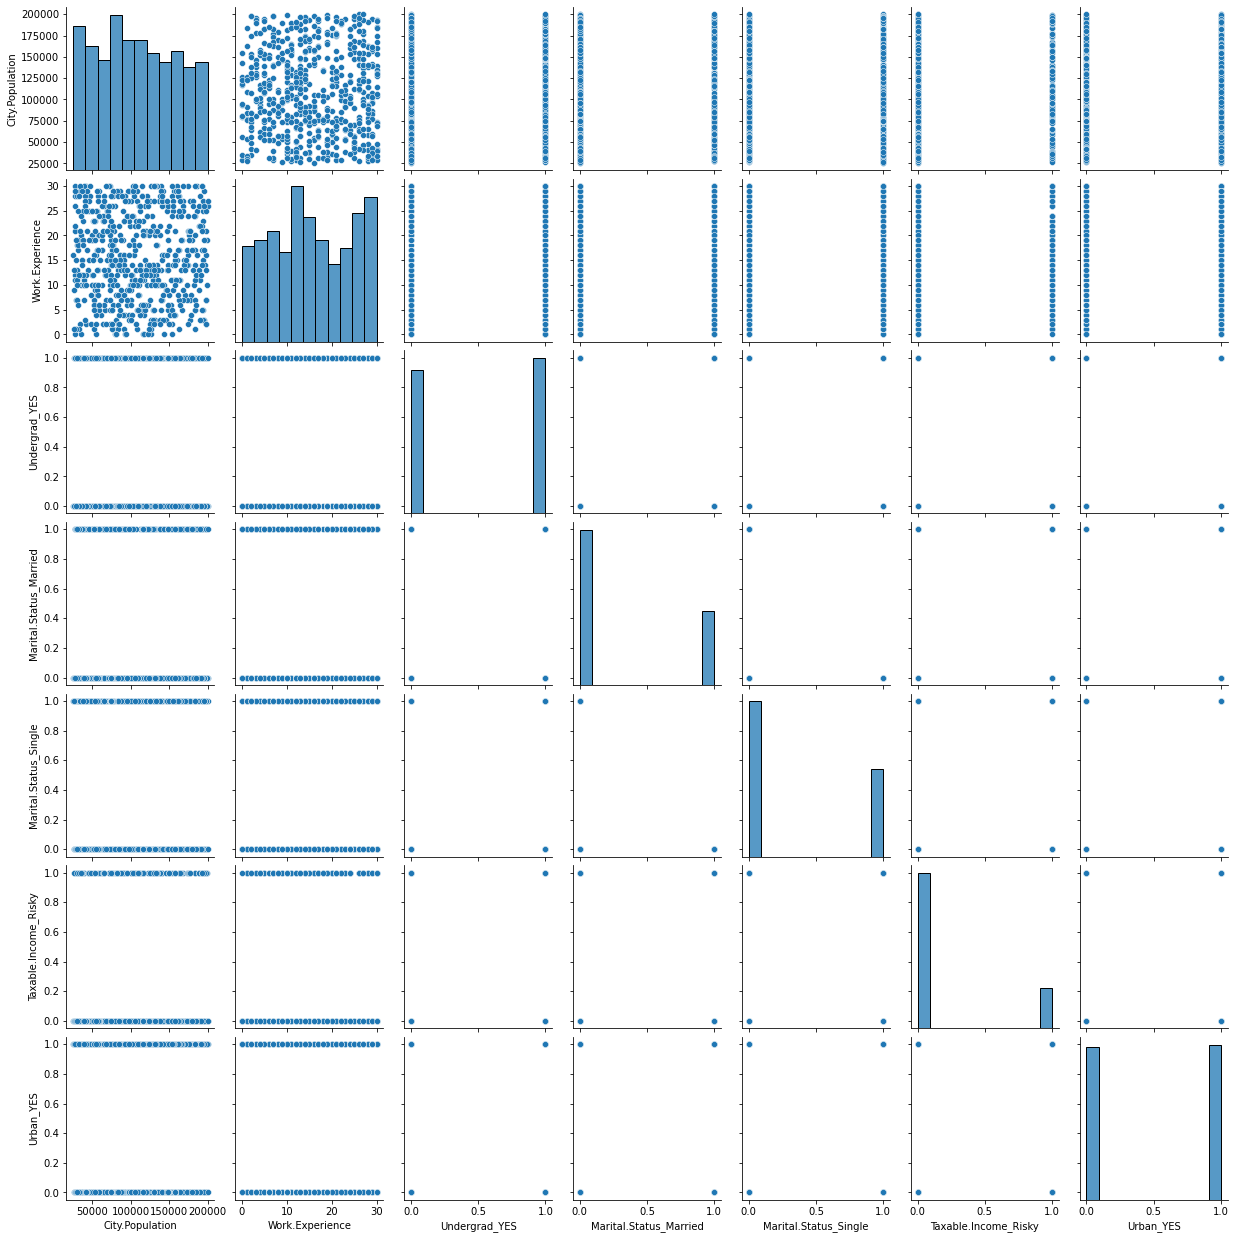

In [74]:
sns.pairplot(df)

<AxesSubplot:xlabel='Taxable.Income_Risky', ylabel='count'>

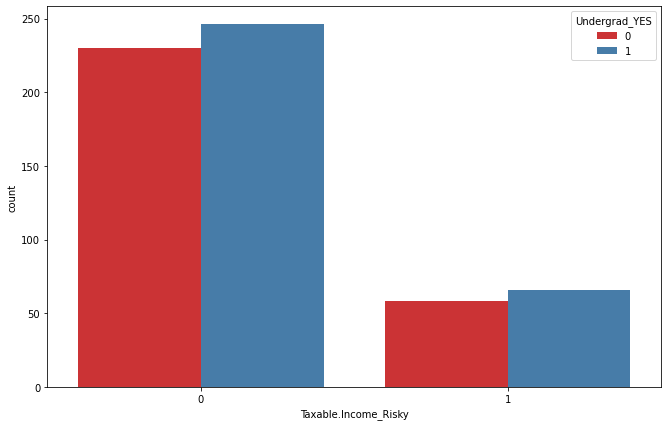

In [76]:
plt.figure(figsize=(11,7))
sns.countplot(x='Taxable.Income_Risky',hue='Undergrad_YES',data=df,palette='Set1')

<AxesSubplot:xlabel='Taxable.Income_Risky', ylabel='count'>

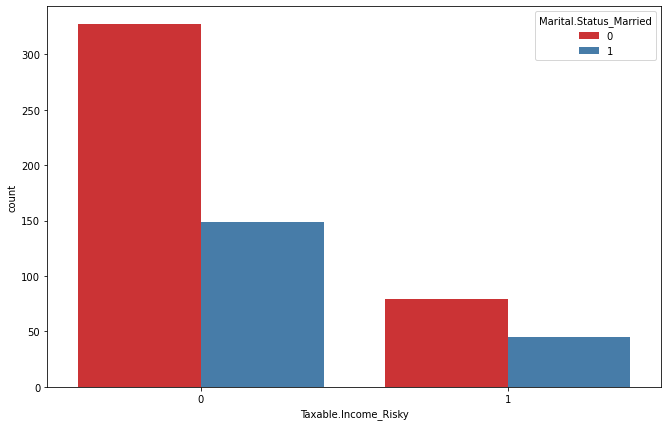

In [77]:
plt.figure(figsize=(11,7))
sns.countplot(x='Taxable.Income_Risky',hue='Marital.Status_Married',data=df,palette='Set1')

In [78]:
import ppscore as pps

In [79]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,City.Population,City.Population,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,City.Population,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,10.061667,DecisionTreeRegressor()
2,City.Population,Undergrad_YES,0.000000,regression,True,mean absolute error,0.480000,0.520000,DecisionTreeRegressor()
3,City.Population,Marital.Status_Married,0.000000,regression,True,mean absolute error,0.323333,0.451667,DecisionTreeRegressor()
4,City.Population,Marital.Status_Single,0.000000,regression,True,mean absolute error,0.361667,0.483333,DecisionTreeRegressor()
5,City.Population,Taxable.Income_Risky,0.000000,regression,True,mean absolute error,0.206667,0.333333,DecisionTreeRegressor()
6,City.Population,Urban_YES,0.000000,regression,True,mean absolute error,0.496667,0.513333,DecisionTreeRegressor()
7,Work.Experience,City.Population,0.000000,regression,True,mean absolute error,42730.781667,43649.215999,DecisionTreeRegressor()
8,Work.Experience,Work.Experience,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,Work.Experience,Undergrad_YES,0.000000,regression,True,mean absolute error,0.480000,0.492327,DecisionTreeRegressor()


In [80]:
X = df.drop('Taxable.Income_Risky',axis=1)
y = df['Taxable.Income_Risky']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
X_train_scaled = scaler.fit_transform(X_train)

In [83]:
dtree_class = DecisionTreeClassifier(max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,)

In [84]:
dtree_class.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4)

In [85]:
X_test_scaled = scaler.transform(X_test)

In [87]:
model = dtree_class.predict_proba(X_test_scaled)

In [88]:
model = model[:,1]

In [90]:
pred_y=dtree_class.predict(X_test_scaled) 

probs_y=dtree_class.predict_proba(X_test_scaled) 


In [93]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 

(0.0, 1.0)

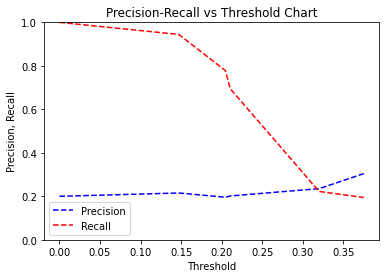

In [94]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

plt.ylim([0,1])

In [100]:
y_train.unique()

array([0, 1], dtype=uint8)

In [101]:
probs_y[:,1] = [0 if x>=0.21 else 1 for x in probs_y[:,1]]

In [96]:
probs_y[:,1] = ['Risky' if x>=0.21 else 'Good' for x in probs_y[:,1]]

ValueError: could not convert string to float: 'Good'

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,probs_y[:,1]))

print(confusion_matrix(y_test,probs_y[:,1]))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       144
           1       0.20      0.31      0.24        36

    accuracy                           0.61       180
   macro avg       0.50      0.50      0.49       180
weighted avg       0.68      0.61      0.64       180

[[99 45]
 [25 11]]
